## Prep for developing an Algorithmic Trading Strategy

### Contents:
#### 1. Preliminary Analysis of Stock prices
#### 2. Common Financial Performance Analyses
    a. Returns - Daily, Monthly, Quarterly.
    b. Cumulative Daily Rate of Returns
    c. Consider Multiple stocks
    d. Moving Windows
    e. Volatality calculations
    f. Ordinary Least Squares Regression - statistics modelling   

### 1. Preliminary Analysis of Stock prices

In [1]:
import pandas as pd
import quandl
import datetime
import os
import numpy as np

appl_ticker_data_file = "appl_ticker_data.csv"
if os.path.exists(appl_ticker_data_file):
    apple_ticker_data = pd.read_csv(appl_ticker_data_file,  index_col='Date', header =0, parse_dates=True)
    print("Read apple ticker data from file:", appl_ticker_data_file)
else:
    quandl.ApiConfig.api_key = "CG7axqyftyamjMa2DPB5"
    apple_ticker_data = quandl.get('WIKI/AAPL', start_date = "20061001", end_date = "20120101")
    apple_ticker_data.to_csv(appl_ticker_data_file)
    print("Downloaded apple ticker data from Quandl.")

Read apple ticker data from file: appl_ticker_data.csv


In [2]:
# Size of data
print(apple_ticker_data.shape)
print(type(apple_ticker_data))

(1323, 12)
<class 'pandas.core.frame.DataFrame'>


In [3]:
# First entries
apple_ticker_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


In [4]:
# Last entries
apple_ticker_data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2011-12-23,399.69,403.59,399.495,403.33,9621400.0,0.0,1.0,51.365736,51.866940,51.340676,51.833526,67349800.0
2011-12-27,403.10,409.09,403.020,406.53,9467000.0,0.0,1.0,51.803968,52.573767,51.793687,52.244771,66269000.0
2011-12-28,406.89,408.25,401.340,402.64,8166500.0,0.0,1.0,52.291036,52.465815,51.577784,51.744852,57165500.0
2011-12-29,403.40,405.65,400.510,405.12,7713500.0,0.0,1.0,51.842522,52.131679,51.471117,52.063566,53994500.0
2011-12-30,403.51,406.28,403.490,405.00,6416500.0,0.0,1.0,51.856659,52.212643,51.854089,52.048145,44915500.0


In [5]:
# Display basic stats
apple_ticker_data.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.0,1323.0,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03
mean,202.303670,204.674047,199.552209,202.224393,2.689852e+07,0.0,1.0,25.998841,26.303468,25.645240,25.988653,1.882896e+08
std,98.862163,99.387200,98.208529,98.837774,1.467152e+07,0.0,0.0,12.705166,12.772640,12.621165,12.702032,1.027007e+08
min,73.420000,73.980000,72.600000,73.230000,5.624800e+06,0.0,1.0,9.435493,9.507461,9.330112,9.411076,3.937360e+07
25%,122.205000,124.270000,120.275000,122.020000,1.602910e+07,0.0,1.0,15.705046,15.970427,15.457014,15.681271,1.122037e+08
50%,176.260000,179.500000,173.080000,175.840000,2.328380e+07,0.0,1.0,22.651867,23.068252,22.243192,22.597891,1.629866e+08
75%,271.440000,273.927500,268.460000,270.900000,3.308900e+07,0.0,1.0,34.883823,35.203502,34.500852,34.814426,2.316230e+08
max,421.760000,426.700000,415.990000,422.240000,1.204632e+08,0.0,1.0,54.202038,54.836897,53.460513,54.263725,8.432424e+08


In [6]:
print("Index:", apple_ticker_data.index)
print("Columns:", apple_ticker_data.columns)

Index: DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=1323, freq=None)
Columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')


In [7]:
print("Last 5 entries of Open column:", apple_ticker_data['Open'][-5:])

Last 5 entries of Open column: Date
2011-12-23    399.69
2011-12-27    403.10
2011-12-28    406.89
2011-12-29    403.40
2011-12-30    403.51
Name: Open, dtype: float64


In [8]:
# Inspect first 10 rows of Oct-Nov 2008
print("First 10 Rows of Oct-Nov 2008")
display(apple_ticker_data.loc['2008-10-01':'2008-11-30'].head())

First 10 Rows of Oct-Nov 2008


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2008-10-01,111.92,112.36,107.39,109.12,46303000.0,0.0,1.0,14.383280,14.439826,13.801112,14.023441,324121000.0
2008-10-02,108.01,108.79,100.00,100.10,57477300.0,0.0,1.0,13.880790,13.981031,12.851394,12.864245,402341100.0
2008-10-03,104.00,106.50,94.65,97.07,81942800.0,0.0,1.0,13.365450,13.686734,12.163844,12.474848,573599600.0
2008-10-06,91.96,98.78,87.54,98.14,75264900.0,0.0,1.0,11.818142,12.694607,11.250110,12.612358,526854300.0
2008-10-07,100.48,101.50,88.95,89.16,67099000.0,0.0,1.0,12.913080,13.044165,11.431315,11.458303,469693000.0


In [9]:
print("First 10 rows of 2009")
display(apple_ticker_data.loc['2009-01'].head())

First 10 rows of 2009


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2009-01-02,85.88,91.04,85.16,90.75,26643400.0,0.0,1.0,11.036777,11.699909,10.944247,11.662640,186503800.0
2009-01-05,93.17,96.18,92.71,94.58,42200300.0,0.0,1.0,11.973644,12.360471,11.914527,12.154848,295402100.0
2009-01-06,95.95,97.17,92.39,93.02,46046800.0,0.0,1.0,12.330912,12.487699,11.873403,11.954366,322327600.0
2009-01-07,91.81,92.50,90.26,91.01,26894600.0,0.0,1.0,11.798865,11.887539,11.599668,11.696053,188262200.0
2009-01-08,90.43,93.15,90.04,92.70,24053600.0,0.0,1.0,11.621515,11.971073,11.571395,11.913242,168375200.0


In [10]:
display("Low and Close columns of rows filtered by row index", apple_ticker_data.iloc[[0,10],[2,3]])

'Low and Close columns of rows filtered by row index'

,Low,Close
Date,,
2006-10-02,74.300,74.86
2006-10-16,74.789,75.40


In [11]:
# Random sample of 4 items
apple_ticker_data.sample(4)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2011-03-28,353.15,354.32,350.44,350.44,11048400.0,0.0,1.0,45.384697,45.535058,45.036424,45.036424,77338800.0
2011-03-02,349.96,354.35,348.40,352.12,21521100.0,0.0,1.0,44.974738,45.538914,44.774256,45.252328,150647700.0
2008-09-15,142.03,147.69,140.36,140.36,32879800.0,0.0,1.0,18.252835,18.980223,18.038216,18.038216,230158600.0
2011-01-04,332.44,332.50,328.15,331.29,11038600.0,0.0,1.0,42.723173,42.730884,42.171849,42.575382,77270200.0


In [12]:
# Offset aliases for resampling timeseries data - http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
display(apple_ticker_data.resample("M").mean().head())

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,77.020227,78.012818,76.251773,77.125455,2.335707e+07,0.0,1.0,9.898173,10.025734,9.799416,9.911696,1.634995e+08
2006-11-30,85.131190,86.202333,84.202857,85.344762,2.352871e+07,0.0,1.0,10.940545,11.078201,10.821241,10.967991,1.647010e+08
2006-12-31,86.910780,87.825455,85.439000,86.471500,3.016213e+07,0.0,1.0,11.169247,11.286795,10.980102,11.112793,2.111349e+08
2007-01-31,89.056800,90.166000,87.658000,88.881500,4.858890e+07,0.0,1.0,11.445040,11.587588,11.265275,11.422512,3.401223e+08
2007-02-28,85.764737,86.680526,84.782632,85.735263,2.579390e+07,0.0,1.0,11.021964,11.139656,10.895750,11.018176,1.805573e+08


In [13]:
display("Data for Oct 2006 monthend:", apple_ticker_data.loc['2006-10-31'])
display("Data for Oct 2006 monthend:", apple_ticker_data.loc['2007-01-03'])
display("Show month-end data.", apple_ticker_data.asfreq(freq="M", method='bfill').head())

'Data for Oct 2006 monthend:'

Open           8.145000e+01
High           8.168000e+01
Low            8.023000e+01
Close          8.108000e+01
Volume         1.790980e+07
Ex-Dividend    0.000000e+00
Split Ratio    1.000000e+00
Adj. Open      1.046746e+01
Adj. High      1.049702e+01
Adj. Low       1.031067e+01
Adj. Close     1.041991e+01
Adj. Volume    1.253686e+08
Name: 2006-10-31 00:00:00, dtype: float64

'Data for Oct 2006 monthend:'

Open           8.629000e+01
High           8.658000e+01
Low            8.190000e+01
Close          8.380000e+01
Volume         4.422570e+07
Ex-Dividend    0.000000e+00
Split Ratio    1.000000e+00
Adj. Open      1.108947e+01
Adj. High      1.112674e+01
Adj. Low       1.052529e+01
Adj. Close     1.076947e+01
Adj. Volume    3.095799e+08
Name: 2007-01-03 00:00:00, dtype: float64

'Show month-end data.'

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,81.450,81.68,80.23,81.08,17909800.0,0.0,1.0,10.467460,10.497018,10.310673,10.419910,125368600.0
2006-11-30,92.215,92.68,91.06,91.66,31088800.0,0.0,1.0,11.850913,11.910672,11.702479,11.779588,217621600.0
2006-12-31,86.290,86.58,81.90,83.80,44225700.0,0.0,1.0,11.089468,11.126737,10.525291,10.769468,309579900.0
2007-01-31,84.860,86.00,84.35,85.73,30573900.0,0.0,1.0,10.905693,11.052199,10.840151,11.017500,214017300.0
2007-02-28,83.000,85.60,83.00,84.61,32838400.0,0.0,1.0,10.666657,11.000793,10.666657,10.873564,229868800.0


### Visualizing time-series data

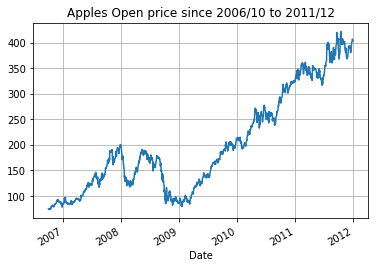

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
apple_ticker_data['Open'].plot(title = "Apples Open price since 2006/10 to 2011/12", grid = True)
plt.show()

## 2. Common Financial Performance Analyses

### Returns

#### Daily Returns

In [15]:
# Assign Adj close to daily_close
daily_close = apple_ticker_data['Adj. Close']

# Daily percent change
daily_close_pct = daily_close.pct_change()

daily_close_pct.fillna(0, inplace=True)
print(daily_close_pct.head())

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)
print(daily_log_returns.head())

Date
2006-10-02    0.000000
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
Name: Adj. Close, dtype: float64
Date
2006-10-02         NaN
2006-10-03   -0.010609
2006-10-04    0.017531
2006-10-05   -0.007323
2006-10-06   -0.008185
Name: Adj. Close, dtype: float64


#### Monthly returns - by using month end values and not month mean.

In [16]:
monthly_close = daily_close.resample('BM').apply(lambda x: x[-1])
monthly_close_percent_change = monthly_close.pct_change()
print(monthly_close_percent_change.head())

Date
2006-10-31         NaN
2006-11-30    0.130488
2006-12-29   -0.074405
2007-01-31    0.010490
2007-02-28   -0.013064
Freq: BM, Name: Adj. Close, dtype: float64


#### Quarterly returns - by considering means of each quarter

In [17]:
quaterly_close = daily_close.resample("Q").mean()
quaterly_close_percent_change = quaterly_close.pct_change()
print(quaterly_close_percent_change.head())

Date
2006-12-31         NaN
2007-03-31    0.068696
2007-06-30    0.223511
2007-09-30    0.252164
2007-12-31    0.316822
Freq: Q-DEC, Name: Adj. Close, dtype: float64


#### Alternative way to calculate daily close percentage change

In [18]:
daily_close_pct = daily_close/daily_close.shift(1) - 1
print(daily_close_pct.head())

Date
2006-10-02         NaN
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
Name: Adj. Close, dtype: float64


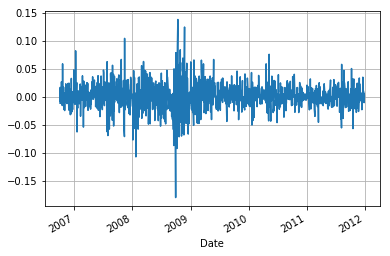

In [19]:
daily_close_pct.plot(grid= True)
plt.show()

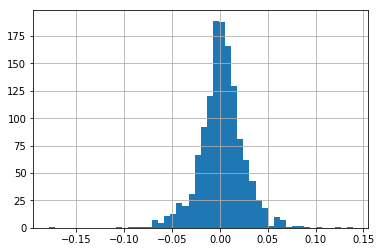

In [20]:
daily_close_pct.hist(bins=50)

In [21]:
daily_close_pct.describe()

count    1322.000000
mean        0.001567
std         0.023994
min        -0.179195
25%        -0.010630
50%         0.001680
75%         0.014306
max         0.139050
Name: Adj. Close, dtype: float64

### Cumulative daily rate of returns

In [22]:
daily_close.head()

Date
2006-10-02    9.620553
2006-10-03    9.519027
2006-10-04    9.687381
2006-10-05    9.616698
2006-10-06    9.538304
Name: Adj. Close, dtype: float64

In [23]:
daily_close['2006-10-06']/daily_close['2006-10-02']

0.9914507079882402

Date
2006-10-02         NaN
2006-10-03    0.989447
2006-10-04    1.006946
2006-10-05    0.999599
2006-10-06    0.991451
Name: Adj. Close, dtype: float64


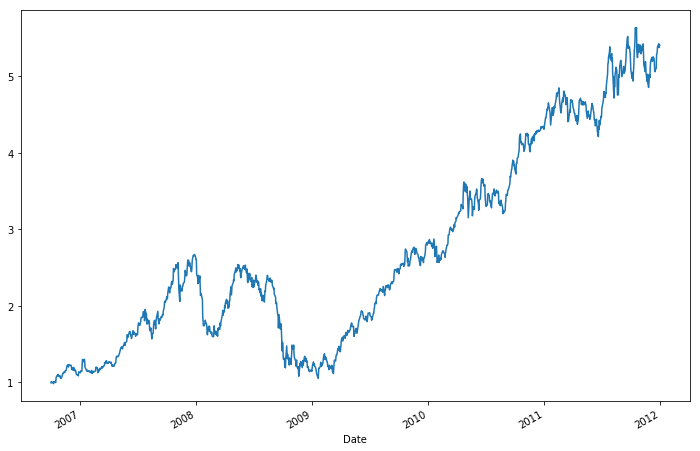

In [24]:
daily_rate_cum = (1+daily_close_pct).cumprod()
print(daily_rate_cum.head())

daily_rate_cum.plot(figsize=(12,8))
plt.show()

### Consider multiple Stock data

In [25]:
def get_data(tickers, start_date, end_date, csv_file_name):
    if os.path.exists(csv_file_name):
        all_data = pd.read_csv(csv_file_name,  index_col=['Ticker','Date'], header =0, parse_dates=True)
        print("Read tickers data from file:", csv_file_name)
        return all_data
    else:
        quandl.ApiConfig.api_key = "CG7axqyftyamjMa2DPB5"
        list_of_df = []
        for ticker in tickers:
            ticker_data = quandl.get('WIKI/'+ticker, start_date = start_date, end_date = end_date)
            list_of_df.append(ticker_data)
            print("Downloaded", ticker ," ticker data from Quandl. Size:", len(ticker_data))
        
        all_data = pd.concat(list_of_df, keys = tickers, names = ['Ticker', 'Date'])
        all_data.to_csv(csv_file_name)
        return all_data
            

In [26]:
tickers = ['AAPL', 'MSFT', 'IBM', 'GOOGL']
all_data = get_data(tickers, '2006-10-01', '2012-01-01', "all_ticker_data.csv")

Read tickers data from file: all_ticker_data.csv


### Plot Adj.Close values of above 4 tickers.

In [27]:
daily_close = all_data['Adj. Close'].reset_index().pivot('Date', 'Ticker')
daily_close.head()

Adj. Close                                  
Ticker           AAPL       GOOGL        IBM       MSFT
Date                                                   
2006-10-02   9.620553  201.341522  63.265259  20.974969
2006-10-03   9.519027  202.645547  63.095254  20.982636
2006-10-04   9.687381  208.493600  64.215745  21.419614
2006-10-05   9.616698  206.542577  64.076649  21.404282
2006-10-06   9.538304  210.901031  64.246655  21.365950

In [28]:
daily_close_pct = daily_close.pct_change()

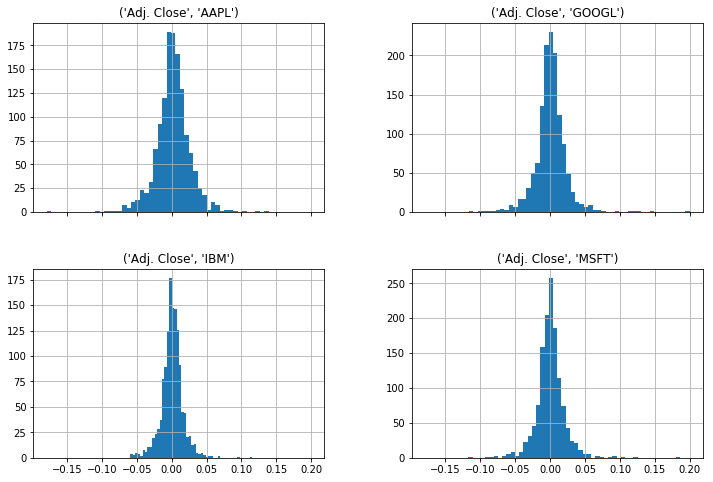

In [29]:
daily_close_pct.hist(sharex = True, figsize=(12,8), bins = 50)
plt.show()

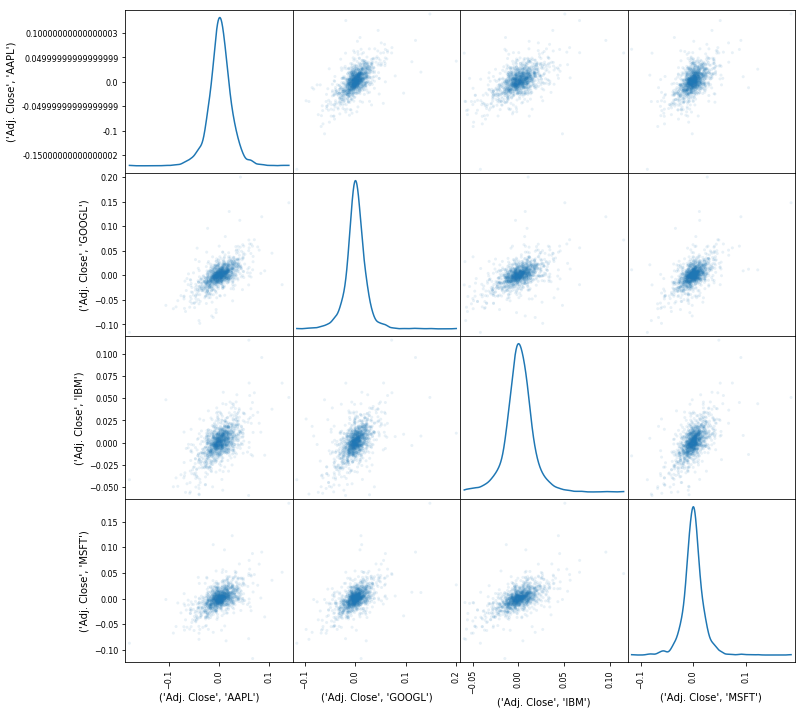

In [30]:
pd.plotting.scatter_matrix(daily_close_pct, diagonal = 'kde', alpha = 0.1, figsize=(12,12))
plt.show()

### Moving Windows

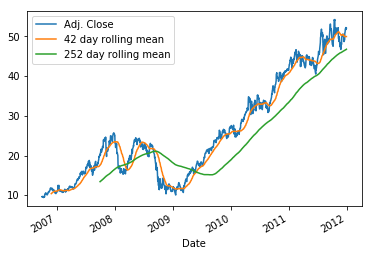

In [31]:
appl_daily_close = apple_ticker_data['Adj. Close']
apple_ticker_data['42 day rolling mean'] = appl_daily_close.rolling(window= 42).mean()
apple_ticker_data['252 day rolling mean'] = appl_daily_close.rolling(window= 252).mean()

apple_ticker_data[['Adj. Close', '42 day rolling mean', '252 day rolling mean']].plot()
plt.show()

### Volatality Calculation

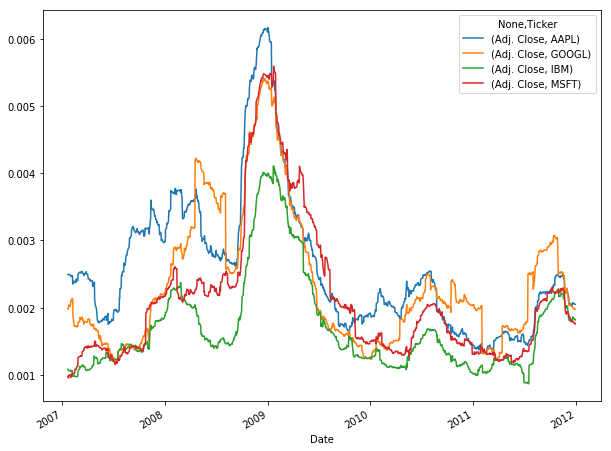

In [32]:
# vol_std = rolling std / sqrt(window size)
rolling_window_size = 75
vol_std = daily_close_pct.rolling(window = rolling_window_size).std()/np.sqrt(rolling_window_size)
vol_std.plot(figsize = (10,8))
plt.show()

### Ordinary Least Squares Regression - statistics modelling

In [33]:
import statsmodels.api as sm
import pandas.tseries

all_adj_close = all_data[['Adj. Close']]

# Calculate log returns
all_returns = np.log(all_adj_close/all_adj_close.shift(1)) 

appl_msft_returns = all_returns.loc[['AAPL', 'MSFT']].reset_index().pivot('Date', 'Ticker')
appl_msft_returns = appl_msft_returns[1:]
appl_msft_returns.columns = ['AAPL', 'MSFT']
appl_msft_returns.head()

/usr/local/lib/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,AAPL,MSFT
Date,,
2006-10-03,-0.010609,0.000365
2006-10-04,0.017531,0.020612
2006-10-05,-0.007323,-0.000716
2006-10-06,-0.008185,-0.001792
2006-10-09,0.005509,-0.005397


In [34]:
appl_msft_returns['AAPL'].head()

Date
2006-10-03   -0.010609
2006-10-04    0.017531
2006-10-05   -0.007323
2006-10-06   -0.008185
2006-10-09    0.005509
Name: AAPL, dtype: float64

In [35]:
# Add a constant
X = sm.add_constant(appl_msft_returns['AAPL'])

In [36]:
# Construct the model
model = sm.OLS(appl_msft_returns['MSFT'], X).fit()

In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     516.0
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           1.09e-96
Time:                        08:49:47   Log-Likelihood:                 3514.1
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

(-0.21385324073841788, 0.1465774312417031, -0.13933872033796774, 0.18538571881022214)


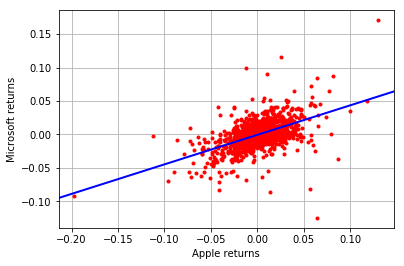

In [38]:
plt.plot(appl_msft_returns['AAPL'], appl_msft_returns['MSFT'], 'r.')

plt.grid(True)
plt.axis('tight')
plt.xlabel("Apple returns")
plt.ylabel("Microsoft returns")

# Plot the regression line
ax = plt.axis()
print(ax)
x = np.linspace(ax[0], ax[1]+0.01)

plt.plot(x, model.params[0]+model.params[1]*x, 'b', lw=2)

plt.show()

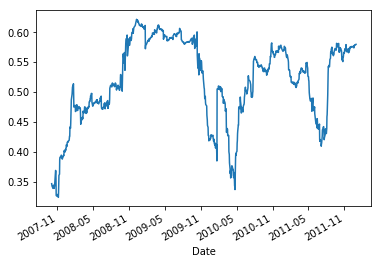

In [39]:
# Plot the rolling correlation

appl_msft_returns['AAPL'].rolling(window = 252).corr(appl_msft_returns['MSFT']).plot()
